In [124]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from pandas.tseries.offsets import DateOffset
from pandas.plotting import autocorrelation_plot
import pandas.testing as tm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from numpy import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
# C:/Users/marce/AppData/Local/Programs/Python/Python310/python.exe -m pip install sklearn  

In [125]:
# Leitura do CSV e setando como Time
df = pd.read_csv('FT01_18_19.csv',delimiter=';', parse_dates=True)
df['Time'] = pd.to_datetime(df.Time)
df = df[df['Time'].notna()]
df = df.set_index('Time')
df = df.resample("D").last()

In [126]:
# Visualizando o final da serie temporal
df.tail()

,Vazao01
Time,
2019-12-27,227.66
2019-12-28,264.96
2019-12-29,209.38
2019-12-30,183.77
2019-12-31,207.73


<AxesSubplot:xlabel='Time'>

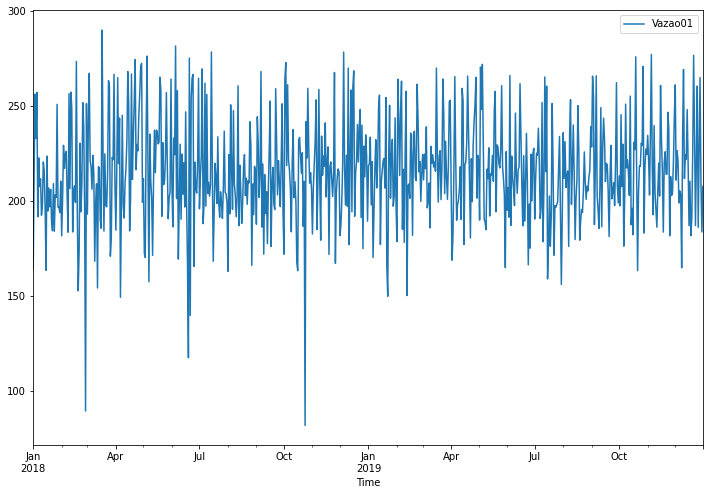

In [127]:
# Setando quem é a coluna e plotando-o completo
df.columns = ['Vazao01']
df.plot(figsize=(12,8))

In [128]:
# Utilizando shift da coluna original para obter outras colunas que serao inputs pro modelo
df['Vazao01_LastDay']=df['Vazao01'].shift(+1)
df['Vazao01_2Daysback']=df['Vazao01'].shift(+2)
df['Vazao01_3Daysback']=df['Vazao01'].shift(+3)
df

,Vazao01,Vazao01_LastDay,Vazao01_2Daysback,Vazao01_3Daysback
Time,,,,
2018-01-01,164.09,NaN,NaN,NaN
2018-01-02,213.96,164.09,NaN,NaN
2018-01-03,256.33,213.96,164.09,NaN
2018-01-04,232.93,256.33,213.96,164.09
2018-01-05,257.22,232.93,256.33,213.96
...,...,...,...,...
2019-12-27,227.66,186.18,260.54,221.30
2019-12-28,264.96,227.66,186.18,260.54
2019-12-29,209.38,264.96,227.66,186.18


In [129]:
# Excluindo todos as linhas NaN
df=df.dropna()
df

,Vazao01,Vazao01_LastDay,Vazao01_2Daysback,Vazao01_3Daysback
Time,,,,
2018-01-04,232.93,256.33,213.96,164.09
2018-01-05,257.22,232.93,256.33,213.96
2018-01-06,191.73,257.22,232.93,256.33
2018-01-07,222.73,191.73,257.22,232.93
2018-01-08,207.58,222.73,191.73,257.22
...,...,...,...,...
2019-12-27,227.66,186.18,260.54,221.30
2019-12-28,264.96,227.66,186.18,260.54
2019-12-29,209.38,264.96,227.66,186.18


In [109]:
# Chamando funções de regressao linear e modelo regressor de random forest
lin_model=LinearRegression()

In [130]:
# Numero de estimações 100, numero de features 3, e aleatoriedade 1 pois a serie já é bem aleatória
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [131]:
# Pegando todas as linhas das tres colunas criadas para input e a coluna original para output e concatenando elas todas no final
x1,x2,x3,y=df['Vazao01_LastDay'],df['Vazao01_2Daysback'],df['Vazao01_3Daysback'],df['Vazao01']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[256.33 213.96 164.09]
 [232.93 256.33 213.96]
 [257.22 232.93 256.33]
 ...
 [264.96 227.66 186.18]
 [209.38 264.96 227.66]
 [183.77 209.38 264.96]]


In [132]:
# Separando dados de treino e teste treino 30% e teste 70%
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [133]:
# Aplicar fit do modelo
model.fit(X_train,y_train)

RandomForestRegressor(max_features=3, random_state=1)

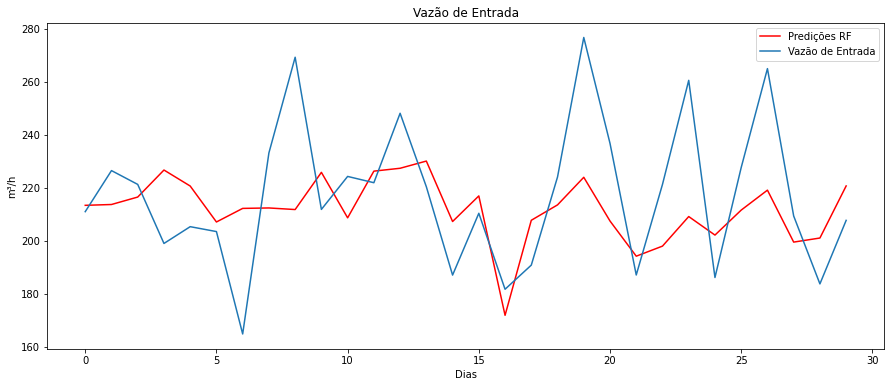

In [148]:
# Prever os dados utilizando os 70% de teste e depois plotando junto com os 30% de treino
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(pred, color='red')
plt.title('Vazão de Entrada')
plt.plot(y_test)
plt.legend(['Predições RF', 'Vazão de Entrada'], loc="upper right")
plt.ylabel('m³/h')
plt.xlabel('Dias')
plt.show()

In [135]:
#Calculando Erros
rmse_rf = sqrt(mean_squared_error(pred,y_test))
mse_rf = (mean_squared_error(pred,y_test))
mape_rf = (mean_absolute_percentage_error(pred,y_test))

print('RMSE:',rmse_rf)
print('MSE:',mse_rf)
print('MAPE:',mape_rf)


RMSE: 25.270306781794314
MSE: 638.5884048459998
MAPE: 0.09446099749956942
